In [22]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [23]:
def L_mat(n):
  L = np.zeros((n-1, n))
  for i in range(n-1):
    L[i][i] = 1
    L[i][i+1] = -1
  return np.matrix(L)
# L(3)

In [25]:
def project(v, l):
    tmp = v[:]
    for i in range(len(v)):
        if(int(v[i]) > l):
            tmp[i]=l
        elif(int(v[i]) < -l):
            tmp[i]=-l
    return tmp

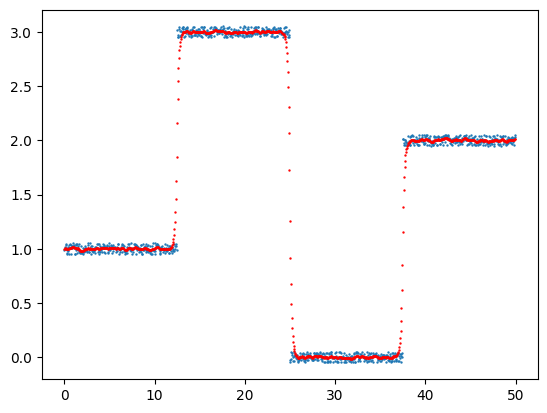

In [26]:
t = np.arange(0, 50, 0.05)
levels = [1, 3, 0, 2]

l_t = len(t)

x = []
for i in range(l_t):
  x.append(levels[int(t[i] / 12.5)])

w = []
for i in range(l_t):
  w.append(random.uniform(-0.05, 0.05))

# y = x + w
y = []
for i in range(l_t):
  y.append(x[i] + w[i])

L = L_mat(l_t)

# signal
x_pred = inv(np.identity(l_t) +  10 * L.transpose()*L) * np.matrix(y).transpose()
plt.scatter(t, y, s = 0.5)
plt.scatter(t, [float(i) for i in x_pred],color="red",s = 0.5)
plt.show()


In [27]:
def gradient_projection(y, l):
  mu = []
  l_y = len(y)
  for i in range(l_y-1):
    mu.append(random.uniform(-l , l))

  mu = np.matrix(mu).transpose()
  L = L_mat(l_y)
  L2 = L*L.transpose()
  for i in range(500):
    mu = project((np.identity(len(L))- .25 * L2) * mu + 0.5 * L * y, l)

  return mu

# gradient_projection(t, 1)


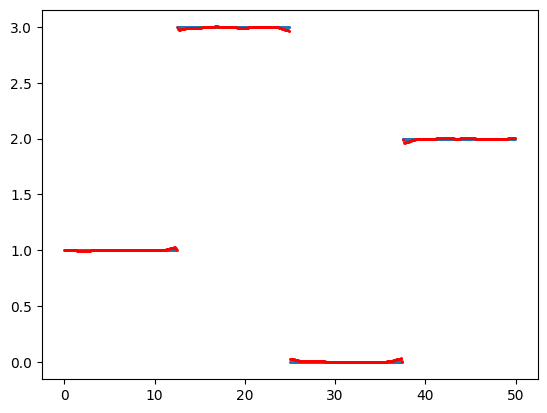

In [28]:
mu_star = gradient_projection(np.matrix(y).transpose(), 1)

x_star = np.matrix(y).transpose() - 0.5 * L_mat(len(y)).transpose() * mu_star

x_star_f = []
for i in x_star:
  x_star_f.append(float(i))

plt.scatter(t, x,s = 0.7)
plt.scatter(t, x_star_f,s = 0.7, color="red")
plt.show()